Владимир Кирилкин ПИ18-2

ML 1.4. Классификация изображений
https://docs.google.com/document/d/1-acb-JE165h0mQQ_c8dsvCPdW84dpeRNRtJD9PRXXOg/edit#

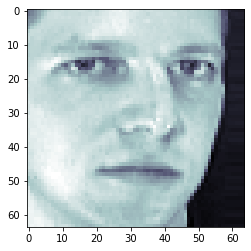

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
faces = fetch_olivetti_faces()

plt.imshow(faces.images[1], cmap=plt.cm.bone)

images = [i.flatten() for i in faces.images]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(images, faces.target,
                                                    test_size=0.2,
                                                   random_state=True)

In [45]:
clf = svm.SVC()
clf.fit( x_train, y_train)

SVC()

In [48]:
predict = clf.predict(x_test)
print(
"Метрика достоверности предсказания",
metrics.accuracy_score(y_test, predict),
"\nМетрика точности",
metrics.precision_score(y_test, predict, average="weighted", zero_division=0),
"\nМетрика полноты",
metrics.recall_score(y_test, predict,average="weighted", zero_division=0),
)

Метрика достоверности предсказания 0.8375 
Метрика точности 0.8120833333333334 
Метрика полноты 0.8375


In [57]:
test_sizes = np.linspace(0.4, 0.1, num=10)
trains = []
tests = []
for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(images, faces.target,
                                                    test_size=test_size,
                                                   random_state=True)
    clf = svm.SVC()
    clf.fit( x_train, y_train)

    trains.append(clf.score(x_train, y_train))
    tests.append(clf.score(x_test, y_test))

Text(0, 0.5, 'Score')

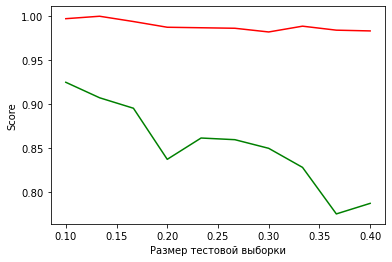

In [59]:
fig, ax = plt.subplots()
ax.plot(test_sizes, trains, "r")
ax.plot(test_sizes, tests, "g")
ax.set_xlabel("Размер тестовой выборки")
ax.set_ylabel("Score")

# Пробуем разные модели

In [20]:
x_train, x_test, y_train, y_test = train_test_split(images, faces.target,
                                                    test_size=0.2,
                                                   random_state=True)

models = [
    LogisticRegression(max_iter=1000),
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=1000)
]

for model in models:
    start_time = time.time()
    model.fit(x_train, y_train)

    spend_time = time.time() - start_time
    predict = model.predict(x_test)
    print(
        model,
        "\nЗатрачено секунд ",
        spend_time,
        "\nScore",
        model.score(x_test, y_test),
        "\nМетрика достоверности предсказания",
        metrics.accuracy_score(y_test, predict),
        "\nМетрика точности",
        metrics.precision_score(y_test, predict, average="weighted", zero_division=0),
        "\nМетрика полноты",
        metrics.recall_score(y_test, predict,average="weighted", zero_division=0),
        "\n"
    )

c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000) 
Затрачено секунд  41.9909245967865 
Score 0.975 
Метрика достоверности предсказания 0.975 
Метрика точности 0.978125 
Метрика полноты 0.975 

SVC(kernel='linear') 
Затрачено секунд  1.0508551597595215 
Score 0.9625 
Метрика достоверности предсказания 0.9625 
Метрика точности 0.96875 
Метрика полноты 0.9625 

SVC() 
Затрачено секунд  1.1135990619659424 
Score 0.8375 
Метрика достоверности предсказания 0.8375 
Метрика точности 0.8120833333333334 
Метрика полноты 0.8375 

KNeighborsClassifier() 
Затрачено секунд  0.16709518432617188 
Score 0.8125 
Метрика достоверности предсказания 0.8125 
Метрика точности 0.8608630952380952 
Метрика полноты 0.8125 

MLPClassifier(max_iter=1000) 
Затрачено секунд  41.36332559585571 
Score 0.9375 
Метрика достоверности предсказания 0.9375 
Метрика точности 0.9354166666666668 
Метрика полноты 0.9375 



Самый быстрый - `KNeighborsClassifier`, но при этом самый неточный

Лучший классификатор по соотношению производительность точность оказался метод опорных векторов с линейным ядром

In [24]:
def draw_learning_curve(model, x, y):
    train_sizes, train_scores, test_scores = learning_curve(model, x, y, n_jobs=-1)
    fig, ax = plt.subplots()
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.grid()
    ax.set_title(model.__class__.__name__)

    ax.set_xlabel("Обучающая выборка")
    ax.set_ylabel("Score")
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Обучение")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Кросс-валидация")
    ax.legend(loc="best")
    plt.show()

## Кривые обучения

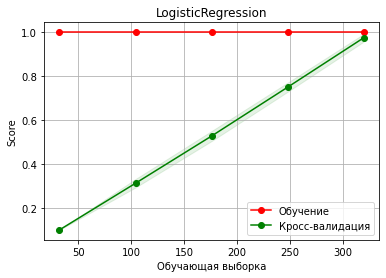

Затрачено секунд 164.91684365272522
Затрачено секунд 3.822026014328003
Затрачено секунд 4.5362865924835205
Затрачено секунд 3.7520029544830322
Затрачено секунд 351.2573878765106


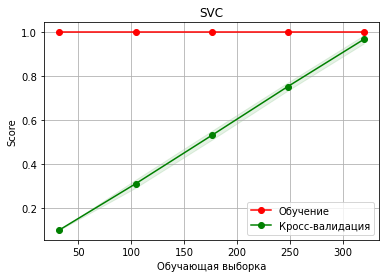

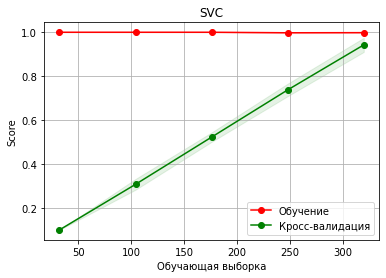

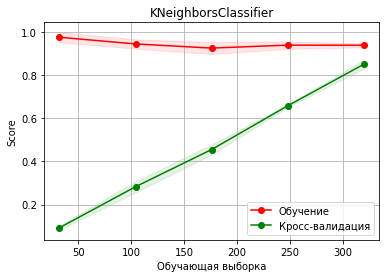

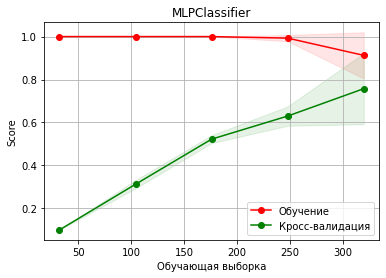

In [25]:
for model in models:
    start_time = time.time()
    draw_learning_curve(model, images, faces.target)

    spend_time = time.time() - start_time
    print(f"Затрачено секунд {spend_time}")